In [69]:
%matplotlib inline

import sqlite3
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from nltk.draw.dispersion import dispersion_plot

In [2]:
conn = sqlite3.connect('paragraphs.db')

data_set = pd.read_sql("Select p.*,pc.section from paragraph as p join page_classes pc "
                 "on p.page = pc.page and "
                 "p.company = pc.company and "
                 "p.year = pc.year",conn)
data_set.head()

,company,year,page,paragraph_nr,paragraph,section
0,BASF,2016,4,64,154 Consolidated Financial Statements BASF R...,auditors report
1,BASF,2016,4,65,Auditor’s report,auditors report
2,BASF,2016,4,66,Auditor’s report,auditors report
3,BASF,2016,4,67,We have audited the consolidated financial sta...,auditors report
4,BASF,2016,4,68,assurance. Knowledge of the business activitie...,auditors report


In [90]:
texts = data_set.groupby(['year'])['paragraph'].apply(lambda x: ' '.join(x)) #'company'

In [91]:
texts.head()

year
2015    Bechtle AG Annual Report 2015 142  c O N S O l...
2016    154 Consolidated Financial  Statements  BASF R...
Name: paragraph, dtype: object

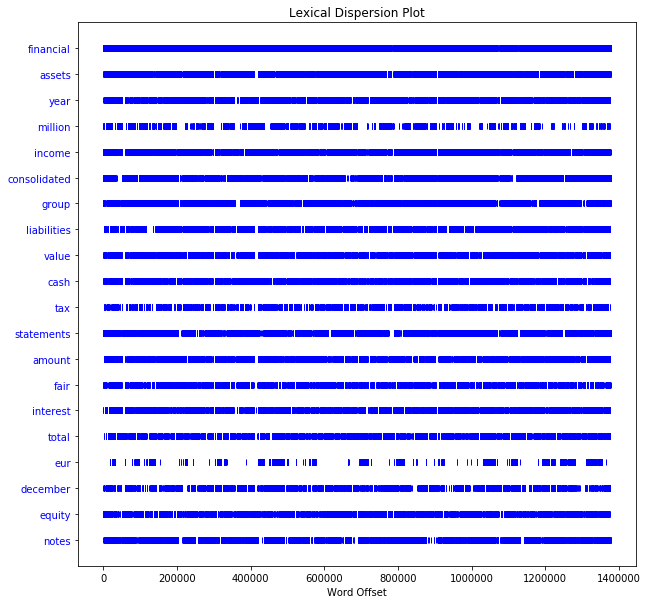

In [98]:
tokens = nltk.word_tokenize(texts[1])
words = [w.lower() for w in tokens if w.isalpha() and w.lower() not in stopwords.words('english') and len(w)>1]

freq = nltk.FreqDist(words)
freq_df = pd.DataFrame(data = list(freq.values()),index=list(freq.keys()),columns=["occurences"]).sort_values(by='occurences',ascending=False)


